In [ ]:
# @title Importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from IPython.display import display, Markdown


from sklearn.metrics import confusion_matrix,classification_report, recall_score, precision_recall_curve, precision_score, accuracy_score, auc, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import warnings #useful for filtering warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting drive in google collab
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# @title Data Analysis

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.dropna(inplace = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 284807 rows and 31 columns


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


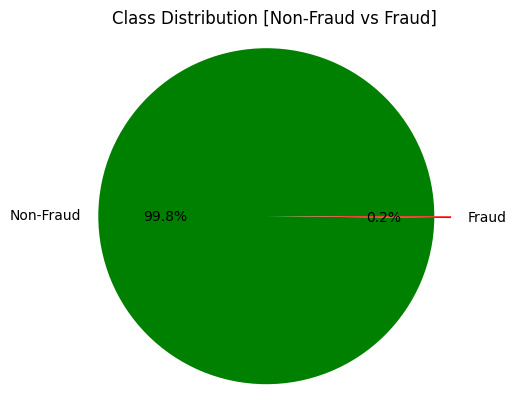

In [ ]:
# @title Class Distribution

#plotting pie chart

labels = ['Non-Fraud', 'Fraud']
sizes = [df['Class'].value_counts()[0], df['Class'].value_counts()[1]]
colors = ['green', 'Red']
explode = (0, 0.1)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 0)
plt.title('Class Distribution [Non-Fraud vs Fraud]')
plt.axis('equal')
plt.show()

This pie chart indicates that dataset is highly imbalanced.

<Axes: >

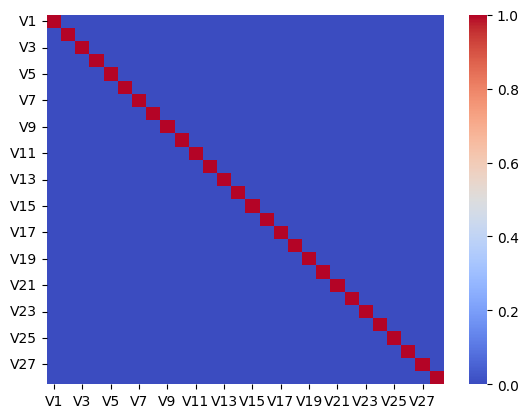

In [ ]:
# @title Interdependency of Features

data = df.drop(columns = ['Time', 'Amount', 'Class'])
sns.heatmap(data.corr(), cmap = 'coolwarm')

Max amount in the dataset is 25691.16
Min amount in the dataset is 0.0


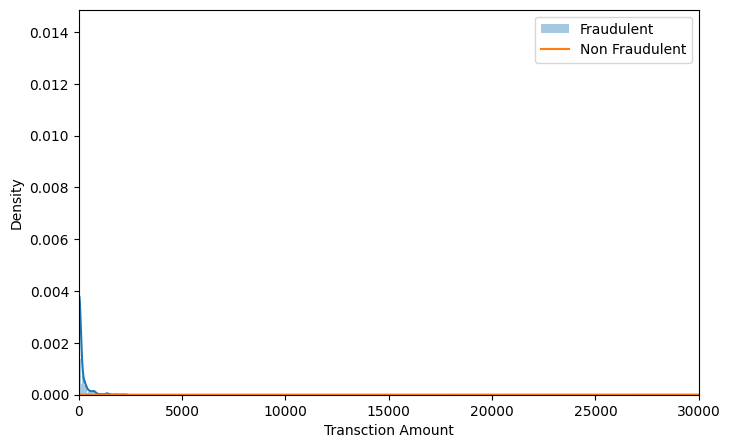

In [ ]:
# @title Dependency of classes on Amount

print(f"Max amount in the dataset is {df['Amount'].max()}")
print(f"Min amount in the dataset is {df['Amount'].min()}")

data_fraud = df[df['Class'] == 1]
data_non_fraud = df[df['Class'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='Fraudulent',hist=True)
ax = sns.distplot(data_non_fraud['Time'],label='Non Fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.xlim(0,30000)
plt.legend()
plt.show()

From above plot, we can see that fradulent transactions are densed in lower range of amount and most of the non-fradulent in higher range of amount

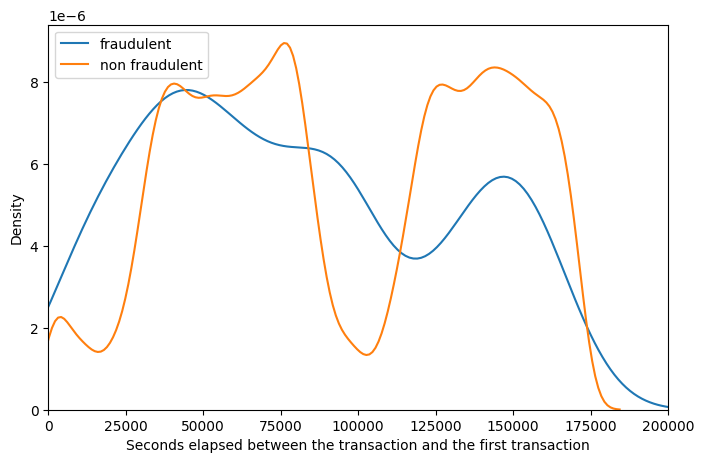

In [ ]:
# @title Dependency of classes on Time

plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transaction and the first transaction')
plt.xlim(0,200000)
plt.legend()
plt.show()

We can't see any specific difference in patterns for both classes. So we can remove the Time column.

In [ ]:
# @title Using train_test_split

x=df.drop(columns=['Class', 'Time']) #removing Time column
y=df['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43,shuffle=True)

In [ ]:
x_train.shape,y_train.shape[0],x_test.shape,y_test.shape[0]

((227845, 29), 227845, (56962, 29), 56962)

In [ ]:
# @title XGBClassifier model

model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100, random_state=42)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [ ]:
# @title Metrics
class_list_train = y_train.value_counts()
cor_train = []
print("Training...")
for i in range(2):
    cor_train.append(sum(1 for j,k in zip(y_train,y_pred_train) if j==i and k==i))
    print(f'Accuracy of Class {i} : {cor_train[i]}/{class_list_train[i]} = {cor_train[i]/class_list_train[i]:.6f}')

print(f"Precision : {precision_score(y_train,y_pred_train):.6f}")

class_list = y_test.value_counts()
cor = []
print("Testing...")
for i in range(2):
    cor.append(sum(1 for j,k in zip(y_test,y_pred_test) if j==i and k==i))
    print(f'Accuracy of Class {i} : {cor[i]}/{class_list[i]} = {cor[i]/class_list[i]:.6f}')

print(f"Precision : {precision_score(y_test,y_pred_test):.6f}")

Training...
Accuracy of Class 0 : 227449/227459 = 0.999956
Accuracy of Class 1 : 323/386 = 0.836788
Precision : 0.969970
Testing...
Accuracy of Class 0 : 56848/56856 = 0.999859
Accuracy of Class 1 : 80/106 = 0.754717
Precision : 0.909091


In [ ]:
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [ ]:
new_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100, random_state=42)

In [ ]:
new_model.fit(x_smote, y_smote)
y_pred_test_new = new_model.predict(x_test)
y_pred_train_new = new_model.predict(x_smote)

In [ ]:
# @title Metrics after Smote
class_list_train_new = y_smote.value_counts()
cor_train_new = []
print("Training...")
for i in range(2):
    cor_train_new.append(sum(1 for j,k in zip(y_smote,y_pred_train_new) if j==i and k==i))
    print(f'Accuracy of Class {i} : {cor_train_new[i]}/{class_list_train_new[i]} = {cor_train_new[i]/class_list_train_new[i]:.6f}')

print(f"Precision : {precision_score(y_smote,y_pred_train_new):.6f}")
class_list_new = y_test.value_counts()
cor_new = []
print("Testing...")
for i in range(2):
    cor_new.append(sum(1 for j,k in zip(y_test,y_pred_test_new) if j==i and k==i))
    print(f'Accuracy of Class {i} : {cor_new[i]}/{class_list_new[i]} = {cor_new[i]/class_list_new[i]:.6f}')

print(f"Precision : {precision_score(y_test,y_pred_test_new):.6f}")

Training...
Accuracy of Class 0 : 225746/227459 = 0.992469
Accuracy of Class 1 : 221982/227459 = 0.975921
Precision : 0.992342
Testing...
Accuracy of Class 0 : 56407/56856 = 0.992103
Accuracy of Class 1 : 96/106 = 0.905660
Precision : 0.176147


In [ ]:

# @title Model Summary

before_smote = {
    "Metric": ["Recall", "Precision"],
    "Train set": [cor_train[1] / class_list_train[1], precision_score(y_train, y_pred_train)],
    "Test set": [cor[1] / class_list[1], precision_score(y_test, y_pred_test)]
}

after_smote = {
    "Metric": ["Recall", "Precision"],
    "Train set": [cor_train_new[1] / class_list_train_new[1], precision_score(y_smote, y_pred_train_new)],
    "Test set": [cor_new[1] / class_list_new[1], precision_score(y_test, y_pred_test_new)]
}

# Function to format values to six decimal places and generate a Markdown table
def generate_table(data):
    headers = data.keys()
    rows = zip(*data.values())
    table = "| " + " | ".join(headers) + " |\n"
    table += "| " + " | ".join([":---------:"] * len(headers)) + " |\n"
    for row in rows:
        formatted_row = [f"{x:.6f}" if isinstance(x, float) else str(x) for x in row]
        table += "| " + " | ".join(formatted_row) + " |\n"
    return table

# Format the specific value in the dictionary before generating the table
before_smote["Train set"][0] = f"{before_smote['Train set'][0]:.6f}"
before_smote["Train set"][1] = f"{before_smote['Train set'][1]:.6f}"
before_smote["Test set"][0] = f"{before_smote['Test set'][0]:.6f}"
before_smote["Test set"][1] = f"{before_smote['Test set'][1]:.6f}"

after_smote["Train set"][0] = f"{after_smote['Train set'][0]:.6f}"
after_smote["Train set"][1] = f"{after_smote['Train set'][1]:.6f}"
after_smote["Test set"][0] = f"{after_smote['Test set'][0]:.6f}"
after_smote["Test set"][1] = f"{after_smote['Test set'][1]:.6f}" if after_smote["Test set"][1] != "" else ""

# Generate the tables
table_before_smote = generate_table(before_smote)
table_after_smote = generate_table(after_smote)

# Combine everything into a Markdown string
markdown_str = f"""
##### Before using SMOTE:

{table_before_smote}

##### After using SMOTE:

{table_after_smote}
"""

# Display the Markdown string
display(Markdown(markdown_str))


##### Before using SMOTE:

| Metric | Train set | Test set |
| :---------: | :---------: | :---------: |
| Recall | 0.836788 | 0.754717 |
| Precision | 0.969970 | 0.909091 |


##### After using SMOTE:

| Metric | Train set | Test set |
| :---------: | :---------: | :---------: |
| Recall | 0.975921 | 0.905660 |
| Precision | 0.992342 | 0.176147 |

